In [1]:
import pandas as pd
import numpy as np
import random
from scipy.stats import spearmanr
from statistics import mean
from matplotlib import pyplot as plt

In [ ]:
COX_PATH = "C:/Users/ANUSKA MAITY/Downloads/Cox Data Final.xlsx" 

In [2]:
# df_concat = pd.concat([df1, df2, df3, df4, df5], axis=0)
cox = pd.read_excel(COX_PATH)
word_counts = cox.groupby('stim.string.left')['subject'].count()

# Filter the word counts to get words with count > 30
words_count_gt_30 = word_counts[word_counts > 30]
words_count_gt_30_df = words_count_gt_30.reset_index(name='count')
df_filtered = cox[cox['stim.string.left'].isin(words_count_gt_30_df['stim.string.left'])]


In [3]:
participant_list = df_filtered.subject.unique().tolist()
cue_list = df_filtered['stim.string.left'].unique().tolist()

In [4]:
group_a = {word: [] for word in cue_list}
group_b = {word: [] for word in cue_list}

In [5]:
coeff_list = []
shuffled_coeff_list = []

In [6]:
df_filtered['resp.type.rescore'] = df_filtered['resp.type.rescore'].apply(lambda x: 1 if x == 'Hit' else 0)

C:\Users\ANUSKA MAITY\AppData\Local\Temp\ipykernel_33984\3147710890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['resp.type.rescore'] = df_filtered['resp.type.rescore'].apply(lambda x: 1 if x == 'Hit' else 0)


In [7]:
matrix = df_filtered.pivot_table(index='stim.string.left', columns='subject', values='resp.type.rescore', aggfunc='mean')

# If you want NaN for missing values, you can replace any missing values with NaN
matrix = matrix.fillna(value=pd.NA)

# # If you want to reset the index to have 'cue' as a regular column (optional)
matrix = matrix.reset_index()

# Display the resulting matrix
# print(matrix)

In [34]:
matrix.to_excel('C:/Users/ANUSKA MAITY/Downloads/Matrix.xlsx')

In [8]:
dfs = pd.DataFrame()

In [9]:
num_iterations = 5000
# mem_A = []
# mem_B = []

mem_A_df = pd.DataFrame()
mem_B_df = pd.DataFrame()

for iteration in range(num_iterations):
    # Leave out the first column (cue column)
    cue_column = matrix[matrix.columns[0]]

    # Shuffle the order of the remaining columns (participants)
    shuffled_columns = np.random.permutation(matrix.columns[1:])

    # Define the size of each split for participants
    split_size_A = 231
    split_size_B = 231

    # Split the shuffled columns into two lists, list_A and list_B
    list_A = shuffled_columns[:split_size_A]
    list_B = shuffled_columns[split_size_A:split_size_A + split_size_B]

    # Create matrix_A by combining the cue column and list_A
    matrix_A = pd.concat([cue_column, matrix[list_A]], axis=1)
    matrix_B = pd.concat([cue_column, matrix[list_B]], axis=1)

    # Now, you have matrix_A and matrix_B for this iteration
    # You can perform any further operations on these two matrices here

    # Example: Print the shapes of matrix_A and matrix_B
    # print(f"Iteration {iteration + 1}")
    # print(f"Matrix A shape: {matrix_A.shape}")
    # print(f"Matrix B shape: {matrix_B.shape}")


## Calculate the average value across participants for each cue in matrix_A
    avg_A = matrix_A.iloc[:, 1:].mean(axis=1).to_frame()
    avg_A.columns = ['Memorability']

    # Add the cue column to avg_A
    avg_A['Cue'] = matrix_A[matrix_A.columns[0]]

    # Reorder the columns in avg_A
    avg_A = avg_A[['Cue', 'Memorability']]

    # Calculate the average value across participants for each cue in matrix_B
    avg_B = matrix_B.iloc[:, 1:].mean(axis=1).to_frame()
    avg_B.columns = ['Memorability']

    # Add the cue column to avg_B
    avg_B['Cue'] = matrix_B[matrix_B.columns[0]]
    avg_B = avg_B[['Cue', 'Memorability']]

    # Store the averages in mem_A and mem_B for this iteration
    # mem_A.append(avg_A)
    # mem_B.append(avg_B)

    # Convert mem_A and mem_B to DataFrames
    # mem_A_df = pd.concat(avg_A, ignore_index=True)
    # mem_B_df = pd.concat(avg_B, ignore_index=True)

    mem_A_df = avg_A
    mem_B_df = avg_B
    mem_shuffled_df = mem_B_df.sample(frac=1)

    # joint_df = pd.concat([mem_A_df, mem_B_df], ignore_index=True)
    # dfs = pd.concat([dfs, joint_df], ignore_index=True)


    #Conversion to array for Spearman Brown

    Memorability_Grp_A = mem_A_df['Memorability'].to_numpy()
    Memorability_Grp_B = mem_B_df['Memorability'].to_numpy()
    Memorability_Grp_B_shuffled = mem_shuffled_df['Memorability'].to_numpy()


    res = spearmanr(Memorability_Grp_A, Memorability_Grp_B)
    coeff = res.statistic
    coeff_list.append(coeff)

    res_shuffled = spearmanr(Memorability_Grp_A, Memorability_Grp_B_shuffled)
    coeff_shuffled = res_shuffled.statistic
    shuffled_coeff_list.append(coeff_shuffled)


In [11]:
matrix_A

,stim.string.left,278,188,48,258,140,388,223,130,4,...,311,195,172,262,42,309,254,19,409,451
0,ACCIDENT,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,ACID,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ADEQUATE,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFFORD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,WARS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
355,WINDS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,WOODEN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
357,WORN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [41]:
print('Mean Spearman Brown Coefficient')
print(mean(coeff_list))

Mean Spearman Brown Coefficient
0.5916383784941333


In [44]:
print(mean(shuffled_coeff_list))

0.0003763565525264294


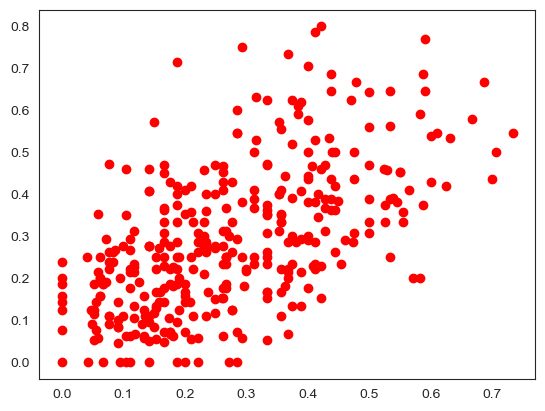

In [45]:
# # Create a scatter plot for df1
#plt.scatter(df_Group_A['Word'], df_Group_A['Memorability'], label='Group A', color='blue')

# # Create a scatter plot for df2 on the same plot
plt.scatter(mem_A_df['Memorability'], mem_B_df['Memorability'], label='Group B', color='red')

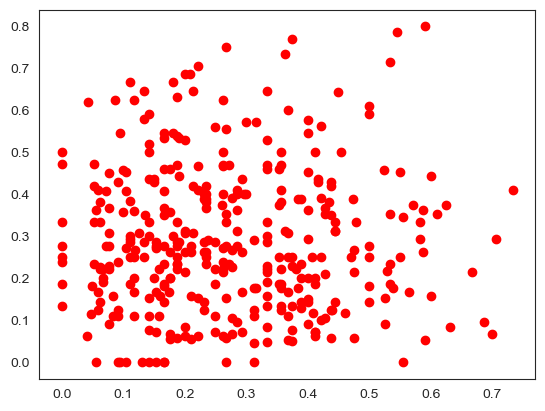

In [46]:
plt.scatter(mem_A_df['Memorability'], mem_shuffled_df['Memorability'], label='Group B', color='red')

In [47]:
with open('C:/Users/ANUSKA MAITY/Downloads/cue_cue_list.txt', 'w') as f:
    for item in coeff_list:
        f.write("%s\n" % item)

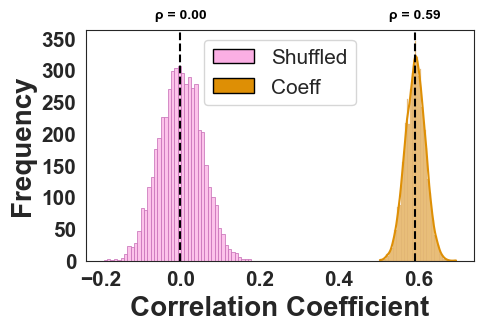

In [48]:
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Set the font family
rcParams['font.family'] = 'Arial'

# Set the color palette for color-blind-friendly colors
colors = sns.color_palette("colorblind")

# Set the image width to 90mm

# Create the plot
plt.figure(figsize=(5, 3))  # Set figure size before any plotting commands
sns.set_style("white")
sns.histplot(shuffled_coeff_list, color=colors[6], edgecolor=colors[4], kde=False)
sns.histplot(coeff_list, color=colors[1], edgecolor=colors[5], kde=True)

# Calculate and plot mean lines
mean_shuffled = sum(shuffled_coeff_list) / len(shuffled_coeff_list)
mean_coeff = sum(coeff_list) / len(coeff_list)
plt.axvline(x=mean_shuffled, color='black', linestyle='dashed', label=f"Mean Shuffled = {mean_shuffled:.2f}")
plt.axvline(x=mean_coeff, color='black', linestyle='dashed', label=f"Mean Coeff = {mean_coeff:.2f}")

# Annotate mean values outside the plot
plt.text(mean_shuffled, plt.ylim()[1]*1.05, f"ρ = {mean_shuffled:.2f}", color='black', ha='center', fontweight='bold')
plt.text(mean_coeff, plt.ylim()[1]*1.05, f"ρ = {mean_coeff:.2f}", color='black', ha='center', fontweight='bold')

# Set labels and tick fonts
plt.xlabel('Correlation Coefficient', fontsize=20, fontweight='bold')
plt.ylabel('Frequency', fontsize=20, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

legend_elements = [
    Patch(facecolor=colors[6], edgecolor='black', label='Shuffled'),
    Patch(facecolor=colors[1], edgecolor='black', label='Coeff')
]

# Add legend
plt.legend(handles=legend_elements, fontsize=15)

plt.savefig("C:/Users/ANUSKA MAITY/Downloads/Python Photos/Cue Initial Split Half.eps", format="pdf", bbox_inches="tight", backend="cairo")
plt.show()
